In [101]:
from sympy import *
from furlib import htmr,htmt
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib nbagg
init_printing(use_latex=true)


def newton_raphson(J,b,X0,vals):
    k = 1
    #Jinv = (J.subs(X0)#J.inv().subs(vals).evalf()
    b = b.subs(vals).evalf()
    while True:
        x = ((J.subs(X0).subs(vals)).inv()*b.subs(X0)).evalf()
        if x.norm()<0.0001: break
        for jj,ky in enumerate(X0):
            X0[ky] += (x[jj]).evalf()
        k += 1
    return X0,x,k

rad = lambda x: (x*pi/180).evalf()
deg = lambda x: (x*180/pi).evalf()

In [102]:
a,b = 200,200
R,r = 70, 30
t11 = (63*pi/180).evalf() 
t12 = (48*pi/180).evalf() 
t13 = (43*pi/180).evalf()

In [115]:
t21,t22,t23 = symbols("\\theta_{2(1:4)}")
t31,t32,t33 = symbols("\\theta_{3(1:4)}")
px,py,pz = symbols('p_x, p_y, p_z')
phi1, phi2, phi3 = 0, (-2*pi/3).evalf(), (2*pi/3).evalf()

In [116]:
eq1 = - px*cos(phi1) - py*sin(phi1) + R + a*cos(t11) + b*sin(t31)*cos(t11+t21) - r
eq2 =  px*sin(phi1) - py*cos(phi1) + b*cos(t31)
eq3 = - pz + a*sin(t11) + b*sin(t31)*sin(t11+t21)

eq4 = - px*cos(phi2) - py*sin(phi2) + R + a*cos(t12) + b*sin(t32)*cos(t12+t22) - r
eq5 =  px*sin(phi2) - py*cos(phi2) + b*cos(t32)
eq6 = - pz + a*sin(t12) + b*sin(t32)*sin(t12+t22)

eq7 = - px*cos(phi3) - py*sin(phi3) + R + a*cos(t13) + b*sin(t33)*cos(t13+t23) - r
eq8 =  px*sin(phi3) - py*cos(phi3) + b*cos(t33)
eq9 = - pz + a*sin(t13) + b*sin(t33)*sin(t13+t23)

In [117]:
F = Matrix([eq1,eq2,eq3,eq4,eq5,eq6,eq7,eq8,eq9])
J = F.jacobian([t21,t22,t23,t31,t32,t33,px,py,pz])
#b = -F
X0 = {t21:rad(83), t22:rad(102), t23:rad(102.5), t31:rad(75), t32:rad(110), t33:rad(75), px:30, py:30, pz:267}
vals = {}

In [118]:
XS, *_ = newton_raphson(J,-F,X0,vals)

In [119]:
XS

In [120]:
for x in XS.keys():
    print(deg(XS[x]))

92.4554498506935
96.5008700313649
97.5223690502944
86.8980042096823
104.317812433438
78.8611873260369
-2914.23795544340
620.096122608642
14963.3489099739


<IPython.core.display.Javascript object>


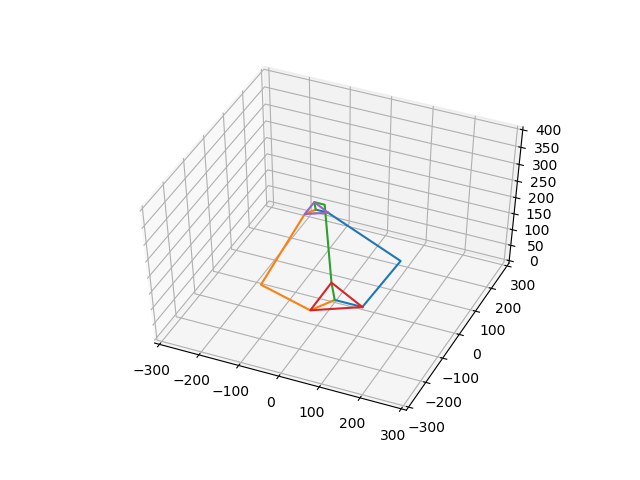

In [121]:
fig = plt.figure()
ax = plt.axes(projection='3d')

H1 = htmr(phi1,"z")#*htmt(R,0,0)
H2 = htmr(phi2,"z")#*htmt(R,0,0)
H3 = htmr(phi3,"z")#*htmt(R,0,0)

O = Matrix([0,0,0,1])

A1 = H1*Matrix([R,0,0,1])
B1 = A1 + H1*Matrix([a*cos(t11),0,a*sin(t11),1])
C1 = (B1 + H1*Matrix([b*sin(t31)*cos(t11+t21), b*cos(t31), b*sin(t31)*sin(t11+t21), 1])).subs(XS)
P = Matrix([XS[px], XS[py], XS[pz], 1])

A2 = H2*Matrix([R,0,0,1])
B2 = A2 + H2*Matrix([a*cos(t12),0,a*sin(t12),1])
C2 = (B2 + H2*Matrix([b*sin(t32)*cos(t12+t22), b*cos(t32), b*sin(t32)*sin(t12+t22), 1])).subs(XS)

A3 = H3*Matrix([R,0,0,1])
B3 = A3 + H3*Matrix([a*cos(t13),0,a*sin(t13),1])
C3 = (B3 + H3*Matrix([b*sin(t33)*cos(t13+t23), b*cos(t33), b*sin(t33)*sin(t13+t23), 1])).subs(XS)

ax.plot([O[0],A1[0],B1[0],C1[0],P[0]], [O[1],A1[1],B1[1],C1[1],P[1]], [O[2],A1[2],B1[2],C1[2],P[2]])
ax.plot([O[0],A2[0],B2[0],C2[0],P[0]], [O[1],A2[1],B2[1],C2[1],P[1]], [O[2],A2[2],B2[2],C2[2],P[2]])
ax.plot([O[0],A3[0],B3[0],C3[0],P[0]], [O[1],A3[1],B3[1],C3[1],P[1]], [O[2],A3[2],B3[2],C3[2],P[2]])
ax.plot([A1[0],A2[0],A3[0],A1[0]], [A1[1],A2[1],A3[1],A1[1]], [A1[2],A2[2],A3[2],A1[2]])
ax.plot([C1[0],C2[0],C3[0],C1[0]], [C1[1],C2[1],C3[1],C1[1]], [C1[2],C2[2],C3[2],C1[2]])

ax.set_xlim(-300,300)
ax.set_ylim(-300,300)
ax.set_zlim(0,400)

In [114]:
(C1-B1).norm(), (B1-A1).norm()